### LABORATORIO DE MODELACIÓN #1 (MAT-282)

### PROBLEMA: COMPORTAMIENTO ALEATORIO DE ACTIVOS FINANCIEROS

__Alumno:__ Fabián Rubilar

__Rol:__ 201510509-K

__Especialista:__ Claudio Pizarro

## Métodos de cadenas de Markov Monte Carlo (MCMC)

Los MCMC son métodos de simulación para generar muestras de las distribuciuones a posteriori y estimar cantidades de interés a posteriori. 
En los MCMC, se simulan valores sucesivamente de una densidad propuesta, que no tiene que ser necesariamente parecida a la densidad posteiori. Cada valor generado depende sólo del anteiror valor simulado, de ahí la noción de cadena de Markov. 
Los MCMC no son exclusivos de la Inferencia Bayesiana, sino que pueden usarse para simular valores de una distribución de la que no es fácil generar muestras. Sinembargo, estos métodos son mus usados en computación moderna Bayesiana, ya que, en la mayoría de los casos, la forma analítica de $\pi(\theta | x)$ es desconocida y la dimensión de $\theta$ elevada.

__Definición:__ Una cadena de Markov $\left \{ X_{t} \right \}_{t\in\mathbb{N}}$ es una secuencia de variables aleatorias $X_{0}, X_{1}, X_{2},..., X_{t},...$, tal que la distribución de probabilidades de $X_{t}$ dado el pasado, depende sólo de $X_{t-1}$. Esta distribución condicional es llamada _kernel de transición_ $X_{t+1}|X_{0}, X_{1},..., X_{t} \sim K(X_{t}, X_{t+1})$. 

__Definición:__ Un estado bastante importante es aquel que es recurrente, no nulo y aperiódico. Recibe el nombre de ergódico

__Definición:__ Un MCMC para simular desde una distribución _f_ es cualquier procedimiento para producir una cadena de Markov ergódica $\left \{ X_{t} \right \}$ cuya distribución estacionaria (Si $X_{t}\sim f$, entonces $X_{t+1}\sim f$) es _f_, y el kernel debe cumplir que: $\int_{X} K(x,y)f(x)dx = f(y)$

## Algoritmo de Metropolis-Hastings

El algoritmo Metropolis-Hastings (MH) permite construir una cadena de Markov $\left \{ X_{t} \right \}$ con distribución estacionaria _f_ imponiendo un mínimo de requerimientos sobre la densidad objetivo.

Considere una función objetivo _f_. El procedimiento escoge una densidad condicional $q(y|x)$, conocida como distribución propuesta. Este algoritmo es de utilidad cuando $q(\cdot |x)$ es fácil de simular o bien es simétrica, esto es $q(x|y) = q(y|x)$.

Generalmente se requiere que la razón: $f(y)/q(y|x)$ sea conocida salvo una constante independiente de __x__.

__Algoritmo 1: Metropolis-Hastings__

__Entrada:__ $x_{t}$

__begin__
    
   Generar $Y_{t}\sim q(y|x_{t})$
   
   Hacer $X_{t+1}=\left\{\begin{matrix}
Y_{t}, & \rho(x_{t}, Y_{t})\\ 
x_{t}, & 1-\rho(x_{t}, Y_{t})
\end{matrix}\right.$

   Donde: $\rho(x,y)=\min \left \{ \frac{f(y)q(x|y)}{f(x)q(y|x)},1 \right \}$
   
   
__Algoritmo 2: Metropolis-Hastings__

__Entrada:__ $x_{t}$

__begin__
    
   Generar $Y_{t}\sim q(y|x_{t})$
   
   Simular $U\sim U(0,1)$
   
   __if__ $U\leq \rho(x_{t}, Y_{t})$ __then__ return $X_{t+1} = Y_{t}$
   
   __else__ return $X_{t+1} = x_{t}$
   

La probabilidad $\rho(x,y)$, dada por: $\rho(x,y)=\min \left \{ \frac{f(y)q(x|y)}{f(x)q(y|x)},1 \right \}$ es conocida como _probabilidad de aceptación Metropolis-Hastings_
  
  

El algoritmo MH siempre acepta valores $y_{t}$ tal que: $\frac{f(y_{t})}{q(y_{t}| x_{t})} > \frac{f(x_{t})}{q(x_{t}| y_{t})}$, y sólo en el caso simétrico es que la aceptación depende de $f(y_{t})> f(x_{t})$

__Observación:__ Cualquier distribución propuesta permitirá obtener muestras aleatorias desde _f_. Sin embargo, la razón de convergencia a la distribución estacionaria depende de la relación entre $q(\cdot | \cdot)$ y $f(\cdot)$.

__PROCEDAMOS A SIMULAR VALORES ALEATORIOS CON DISTRIBUCIÓN NORMAL PARA COMPROBAR LA VALIDEZ DEL ALGORITMO__

Importaremos las librerias necesarias

In [30]:
import numpy as np
import scipy
import scipy.stats
import matplotlib as mpl   
import matplotlib.pyplot as plt
import pandas as pd 
import os
%matplotlib inline

Vamos a generar 50000 muestras a partir de una distribución normal con $\mu$ = 5, y $\sigma$= 2. Pero veremos solo 1000 de ellos.

In [31]:
muestra_random=lambda t:np.random.normal(5,2,t)

poblacion = muestra_random(50000)

#Solo veremos 1000 del total de datos 
valores_aleatorios = poblacion[np.random.randint(0, 50000, 1000)]
valores_aleatorios

array([ 6.93242029,  4.92507092,  6.56678123,  5.30209991,  2.2622328 ,
        6.2329107 ,  6.34079324,  7.30755741,  5.41492865,  2.14055906,
        3.05810441,  4.9644803 ,  5.71337674,  5.50897139,  5.55321573,
        4.08799635,  5.84999172,  3.78000765,  2.50160166,  1.84948648,
        1.61282142,  2.66835175,  3.51854474,  5.79551012,  4.94699579,
        7.45960418,  7.19446845,  4.82471575,  5.8513948 ,  4.98562204,
        7.50815801,  6.13040135,  4.70092858,  7.15965141,  3.03655981,
        2.79078289,  6.0601676 ,  7.22577229,  6.2711551 ,  3.69562451,
        2.7841467 ,  1.99009064,  3.26963873,  3.74475381,  4.78501643,
        8.56921026,  6.36485469,  4.97495173,  7.08168816,  2.43515898,
        3.861668  ,  4.87007305,  2.37528161,  5.54693755,  7.77702385,
        2.693966  ,  4.33647109,  4.81106692,  8.47260789,  6.01268948,
        3.75848915,  8.12856749,  3.68077112,  9.87361154,  4.13422232,
        3.91524672,  5.96480616,  7.57697661,  3.45908307,  8.83

5.030613172656224

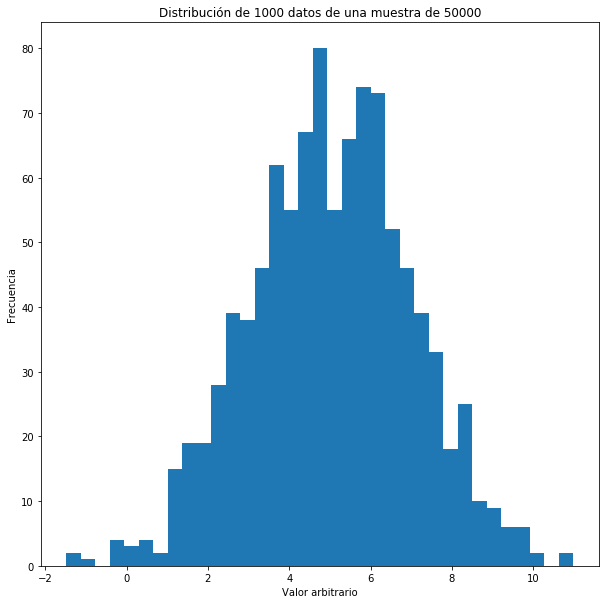

In [32]:
#Graficamos la frecuencia en función de los valores de la muestra anterior.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( valores_aleatorios,bins=35 ,)
ax.set_xlabel("Valor arbitrario")
ax.set_ylabel("Frecuencia")
ax.set_title("Distribución de 1000 datos de una muestra de 50000")

#Calculamos la media de los valores
mu_obs=valores_aleatorios.mean()
mu_obs

Queremos encontrar una distribución para $\sigma_{obs}$ utilizando los valores observados anteriormente. Por lo tanto, según el modelo de __MH__ debe cumplirse que:

$\frac{P(\sigma_{new})q(\sigma_{act}|\sigma_{new})}{P(\sigma_{act})q(\sigma_{new}|\sigma_{act})}> 1$ (1)

Si la razón requerida es menor o igual a 1, la comparamos con un valor aleatorio $U$ en el conjunto cerrado [0,1] ($U\sim U[0,1]$). Si la razón es mayor que $U$, aceptamos $\sigma_{new}$, en caso contrario se rechaza.

Como $P(\theta)\propto f(\theta)$, además estamos trabajando con distribuciones normales, tenemos que:

$f=f(\mu, \sigma)=\frac{1}{\sqrt{2\pi \sigma^{2}}}e^{-\frac{(x_{i}-\mu)^{2}}{2\sigma^{2}}}$, donde $x_{i}$ es el dato i-ésimo.

nota: $\mu$ es un valor constante, que se denotará $\mu_{obs}$ ( es la medida de los datos muestreados anteiormente).

Por otro lado, tenemos que:

$P(\sigma)=\prod_{i=1}^{n} f(x_{i}|\mu, \sigma); \sigma \in \left \{ \sigma_{act} , \sigma_{new} \right \}$

Entonces, aplicamos la función log a (1), ya que, ayuda a la estabilidad numérica, es decir, multiplicar miles de valores pequeños puede causar un colapso en la memoria del sistema. Por lo tanto, la función es una solución perfecta, puesto que, transforma las multiplicaciones en sumas y convierte pequeños valores positivos en números negativos grandes. 

En consecuencia, tenemos que:

$\sum_{i=1}^{n}(-\log (\sigma_{new}\sqrt{2\pi})-\frac{(x_{i}-\mu)^{2}}{2\sigma_{new}^{2}}) + \log (q(\sigma_{act}|\sigma_{new})) > \sum_{i=1}^{n}(-\log (\sigma_{act}\sqrt{2\pi})-\frac{(x_{i}-\mu)^{2}}{2\sigma_{act}^{2}}) + \log (q(\sigma_{new}|\sigma_{act}))$   (2)


Construyamos algunas funciones necesarias para completar el análisis de MH

In [33]:
#Función que define un modelo propuesto para pasar de sigma actual al nuevo sigma

modelo_propuesto = lambda x: [x[0],np.random.normal(x[1],0.5,(1,))[0]]


In [34]:
def prior(x):
    #x[0] = mu, x[1]=sigma (new o act)
    #retorna 1 para todos los valores validos de sigma
    #retorna 0 para todos los valores no validos de sigma, estos son los menores o iguales a 0, puesto que log(0) es "-infinito"
    #y log("numero negativo") no esta definido.
    if(x[1] <=0):
        return 0
    return 1

In [35]:
#Función para calcular ciertos valores en (2)

def calculo_log_manual(x,data):
    #x[0] = mu, x[1]=sigma (new o act)
    #data = valores_aleatorios
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))

In [36]:
#Función similar a la anterior pero con scipy, se evitará por su lentitud

def calculo_log(x,data):
    #x[0]=mu, x[1]=sigma (new o act)
    #data = valores_aleatorios
    return np.sum(np.log(scipy.stats.norm(x[0],x[1]).pdf(data)))

In [37]:
#Veamos si se aceptan o no los valores de una muestra

def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        return (accept < (np.exp(x_new-x)))

In [38]:
def metropolis_hastings(cal_prob,prior, modelo_propuesto, param_inicial,iterationes,data,regla_aceptacion):
    
    # cal_prob(x,data): retorna la probabilidad de que estos parámetros generen los datos.
    # modelo_propuesto(x): función que definimos anteriormente.
    # param_inicial: muestra inicial.
    # iterationes: número de valores aceptados.
    # data: datos que deseamos modelar, en este caso es valores_aleatorios.
    # regla_aceptación(x,x_new): decide si el valor se acepta o no.
    x = param_inicial
    #creamos listas vacias donde se agregaran los valores aceptados y rechazados
    accepted = []
    rejected = []   
    for i in range(iterationes):
        x_new =  modelo_propuesto(x)    
        x_prob = cal_prob(x,data)
        x_new_prob = cal_prob(x_new,data) 
        if (regla_aceptacion(x_prob + np.log(prior(x)),x_new_prob+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [39]:
#Ejecutamos el algoritmo con los parámetros iniciales y recopilamos las muestras aceptadas y rechazadas

accepted, rejected = metropolis_hastings(calculo_log_manual, prior, modelo_propuesto, [mu_obs,0.1], 50000, valores_aleatorios, acceptance)


C:\Users\elele\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
C:\Users\elele\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


In [40]:
#la muestra acepta len(accepted) valores, de los cuales elegimos los ultimos 10

accepted[-10:,1]


array([1.99191657, 1.95843706, 2.04884251, 1.9119982 , 1.89236283,
       1.97911596, 1.97580134, 2.01501841, 2.01474056, 2.02669421])

In [41]:
#Veamos los valores aceptados, ojo que varian cada vez que se compila el programa.

print(accepted.shape)


(5544, 2)


(5544, 2)

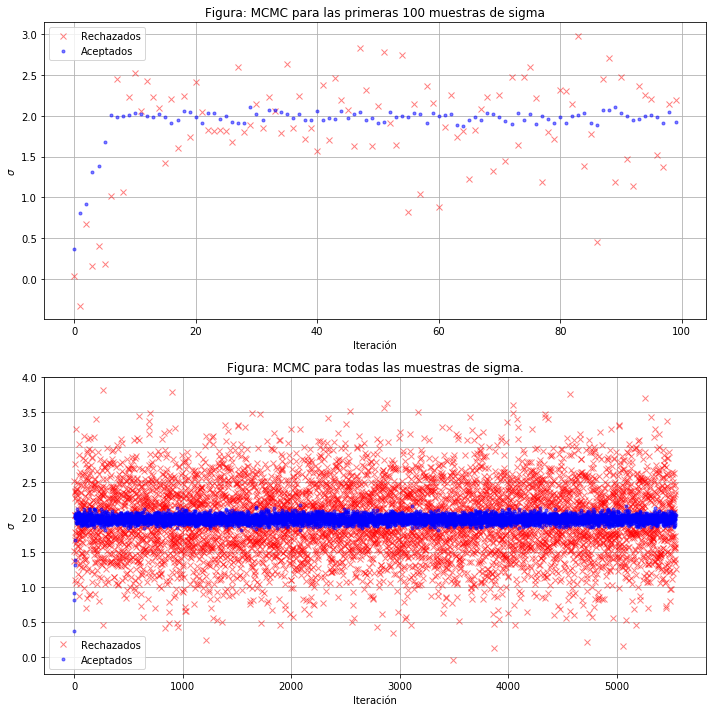

In [42]:
#veamos dos gráficos, el primero consiste en visualizar cierta cantidad de muestras para el sigma

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:100,1], 'rx', label='Rechazados',alpha=0.5)
ax.plot( accepted[0:100,1], 'b.', label='Aceptados',alpha=0.5)
ax.set_xlabel("Iteración")
ax.set_ylabel("$\sigma$")
ax.set_title("Figura: MCMC para las primeras 100 muestras de sigma")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=-accepted.shape[0]
ax2.plot( rejected[to_show:,1], 'rx', label='Rechazados',alpha=0.5)
ax2.plot( accepted[to_show:,1], 'b.', label='Aceptados',alpha=0.5)
ax2.set_xlabel("Iteración")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Figura: MCMC para todas las muestras de sigma.")
ax2.grid()
ax2.legend()



fig.tight_layout()
accepted.shape

Veamos que sucede si descartamos un porcentaje de valores de sigma iniciales

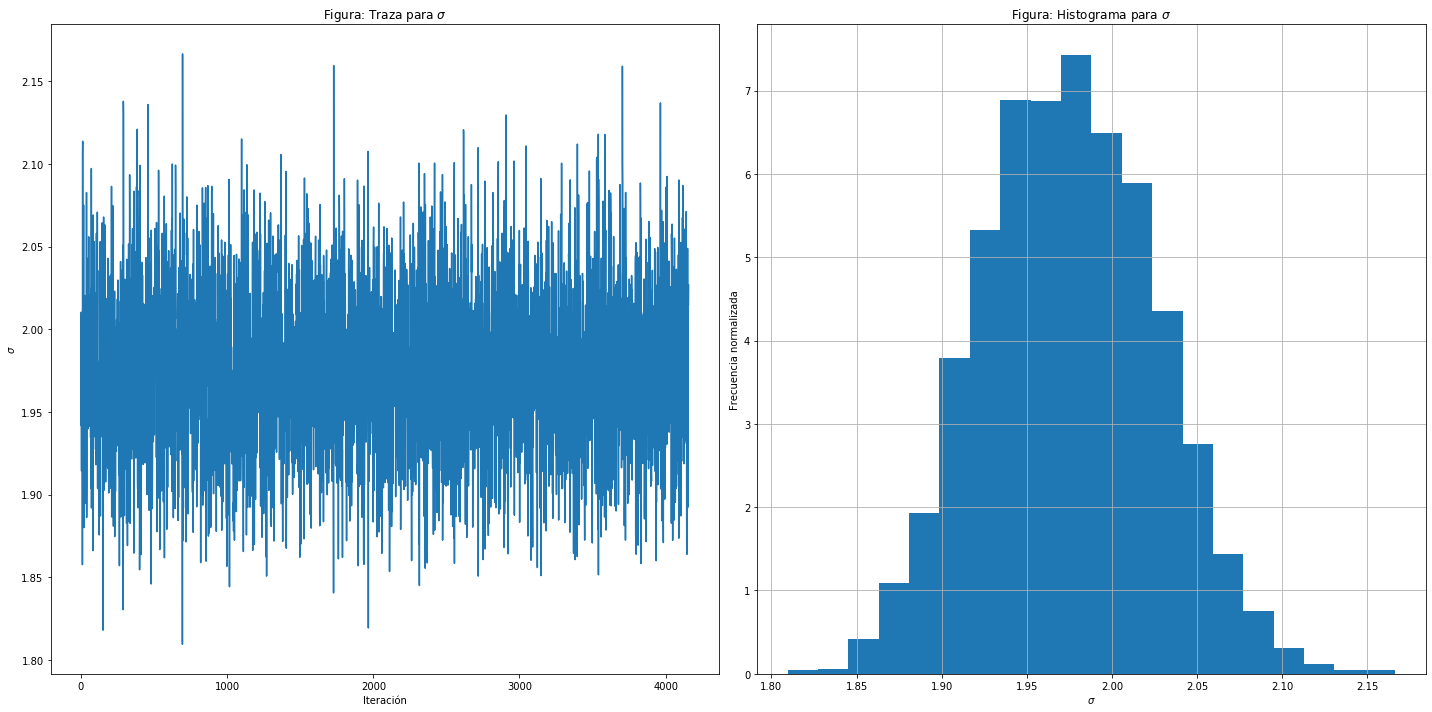

In [43]:
show=int(-0.75*accepted.shape[0]) #descartamos el primer 25% de las muestras
hist_show=int(-0.75*accepted.shape[0])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figura: Traza para $\sigma$")
ax.set_ylabel("$\sigma$")
ax.set_xlabel("Iteración")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20,density=True)
ax.set_ylabel("Frecuencia normalizada")
ax.set_xlabel("$\sigma$")
ax.set_title("Figura: Histograma para $\sigma$")
fig.tight_layout()


ax.grid("off")

El valor más probable para $\sigma $ ronda entre 1.95 y 2.00 . Esto es un poco menos que el valor original de 2.0. La diferencia se debe a que observamos solo el 2% de la población original. 

Ahora procedemos a graficar la distribución predicha para la distribución original.

5.030613172656222 1.9748395240491896


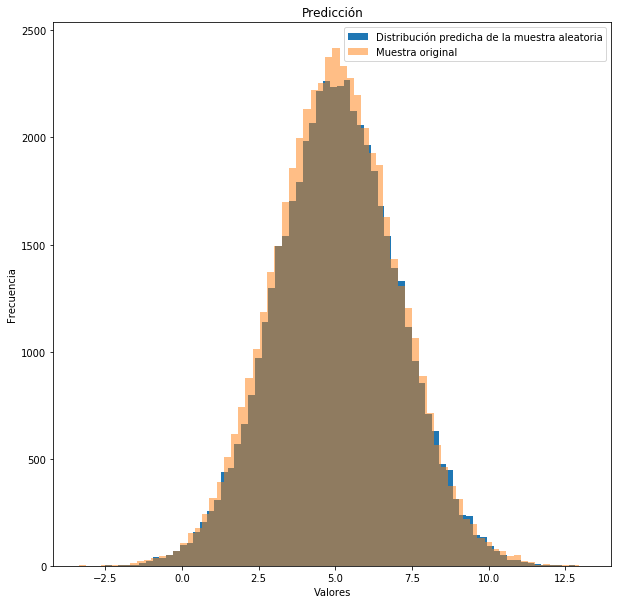

In [44]:
mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.normal(mu,sigma,t)
valores_aleatorios_gen=model(poblacion.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( valores_aleatorios_gen ,bins=70 ,label="Distribución predicha de la muestra aleatoria")
ax.hist( poblacion,bins=70 ,alpha=0.5, label="Muestra original")
ax.set_xlabel("Valores")
ax.set_ylabel("Frecuencia")
ax.set_title("Predicción")
ax.legend()

__Conlusión: Vemos que el algoritmo funciona bien para una distribución normal, donde la predicción es bastante óptima a pesar de solo ver el 2% de la muestra aleatoria original. Una complicación evidente para valores reales es la distribución que estos tendrían.__

### Metropolis-Hasting con valores reales 

__TRATAREMOS DE PREDECIR CON UNA DISTRIBUCIÓN PROPUESTA NORMAL__

Usaremos como datos, los valores del dólar en el año 2020, desde el 01 de enero hasta el 16 de noviembre

In [59]:
dolar = 'dolar.xls'
df = pd.read_excel(dolar)
#Primero cambiamos el nombre de las columnas
df.columns = ['Fecha', 'Valor de cambio']
#Borramos las filas que no sirven o que no cumplen con el formato numérico requerido
dolar_df=df.dropna()
#Borramos la primera fila 
df_dolar = dolar_df.drop([1], axis=0)
df_dolar.reset_index(drop=True, inplace=True)
df_dolar

,Fecha,Valor de cambio
0,2020-01-02 00:00:00,748.74
1,2020-01-03 00:00:00,754.16
2,2020-01-06 00:00:00,758.49
3,2020-01-07 00:00:00,771.82
4,2020-01-08 00:00:00,773.12
...,...,...
216,2020-11-10 00:00:00,753.75
217,2020-11-11 00:00:00,760.9
218,2020-11-12 00:00:00,757.42
219,2020-11-13 00:00:00,757.43


In [60]:
#Ahora retornamos los 221 valores de la columna 'Valor de cambio'
valores_muestreo = np.array(df_dolar.iloc[:, 1])
valores_muestreo

array([748.74, 754.16, 758.49, 771.82, 773.12, 766.83, 764.69, 770.56,
       777.66, 772.29, 772.01, 773.36, 771.38, 769.93, 770.5, 772.12,
       771.94, 776.52, 787.86, 788.13, 788.18, 797.96, 799.11, 790.92,
       781.78, 776.99, 779.12, 788.8, 795.88, 792.48, 788.33, 795.12,
       792.73, 791.95, 796.9, 797.4, 804.74, 809.82, 810.2, 807.96, 811.1,
       816.26, 818.32, 817.45, 809.81, 812.19, 823.28, 828.95, 841.06,
       834.22, 835.48, 852.06, 836.66, 850.51, 855.09, 862.69, 867.83,
       851.01, 861.07, 847.04, 843.96, 836.05, 835.23, 846.3, 852.03,
       863.81, 861.89, 863.99, 853.91, 842.05, 851.9, 839.49, 844.57,
       848.63, 859.31, 852.52, 849.45, 856.23, 862.06, 856.51, 858.87,
       859.95, 856.76, 850.41, 836.62, 837.92, 838.74, 832.84, 839.08,
       836.27, 827.65, 826.05, 821.88, 820.38, 822.93, 823.86, 820.65,
       819.08, 806.17, 805.75, 803.74, 802.1, 816.47, 812.74, 806.32,
       796.46, 782.86, 769.13, 775.58, 764.97, 769.26, 771.96, 767.93,
       

Ahora calculemos la media y la desviación típica de la muestra _valores_muestreo_

In [61]:
media = np.mean(valores_muestreo)
std = np.std(valores_muestreo, ddof=1)
print(media)
print(std)

798.6275113122172
30.137292960053635


In [62]:
#Para evitar errores transformaremos los valores de muestreo a variables totalmente numéricas
valores_muestreo
valores_dolar = pd.to_numeric(valores_muestreo, errors='coerce')
valores_dolar

array([748.74, 754.16, 758.49, 771.82, 773.12, 766.83, 764.69, 770.56,
       777.66, 772.29, 772.01, 773.36, 771.38, 769.93, 770.5 , 772.12,
       771.94, 776.52, 787.86, 788.13, 788.18, 797.96, 799.11, 790.92,
       781.78, 776.99, 779.12, 788.8 , 795.88, 792.48, 788.33, 795.12,
       792.73, 791.95, 796.9 , 797.4 , 804.74, 809.82, 810.2 , 807.96,
       811.1 , 816.26, 818.32, 817.45, 809.81, 812.19, 823.28, 828.95,
       841.06, 834.22, 835.48, 852.06, 836.66, 850.51, 855.09, 862.69,
       867.83, 851.01, 861.07, 847.04, 843.96, 836.05, 835.23, 846.3 ,
       852.03, 863.81, 861.89, 863.99, 853.91, 842.05, 851.9 , 839.49,
       844.57, 848.63, 859.31, 852.52, 849.45, 856.23, 862.06, 856.51,
       858.87, 859.95, 856.76, 850.41, 836.62, 837.92, 838.74, 832.84,
       839.08, 836.27, 827.65, 826.05, 821.88, 820.38, 822.93, 823.86,
       820.65, 819.08, 806.17, 805.75, 803.74, 802.1 , 816.47, 812.74,
       806.32, 796.46, 782.86, 769.13, 775.58, 764.97, 769.26, 771.96,
      

In [63]:
#Construyamos una muestra de valores arbitrarios para comparar al final

muestra_aleatoria=lambda t:np.random.normal(media,std,t)

pob_aleatoria = muestra_aleatoria(50000)

#Solo veremos 221 del total de datos 
valores_creados = pob_aleatoria[np.random.randint(0, 50000, 221)]
valores_creados

array([805.40674277, 761.41508878, 768.80209556, 759.81944028,
       812.64605439, 834.35474157, 836.1471253 , 806.8263642 ,
       841.33158093, 849.02906915, 838.95625902, 733.10970005,
       816.17528532, 811.4253215 , 816.68557409, 816.81734133,
       803.894343  , 827.65802287, 793.0566772 , 783.67021948,
       824.61286079, 829.01827602, 844.79842038, 802.26182903,
       843.60787894, 784.57968596, 809.22646043, 804.60403557,
       796.03956522, 764.10771243, 826.30596943, 796.69036881,
       781.55599426, 822.01723722, 830.67170893, 783.15648701,
       801.46111204, 829.4783518 , 806.0288576 , 798.13072331,
       752.219755  , 772.14566787, 830.30379645, 813.99435755,
       792.91443582, 794.8837838 , 850.83767016, 744.56937765,
       793.72645719, 829.7199196 , 800.89229898, 816.85289011,
       806.97379925, 820.83658077, 864.85276513, 777.62249946,
       835.39804318, 808.85306762, 880.7666591 , 809.57372358,
       808.5030025 , 781.17988685, 819.99729562, 771.16

In [64]:
#Agregamos una columna nombrada 'Día'
df_dolar['Día'] = df_dolar.index + 1
df_dolar

,Fecha,Valor de cambio,Día
0,2020-01-02 00:00:00,748.74,1
1,2020-01-03 00:00:00,754.16,2
2,2020-01-06 00:00:00,758.49,3
3,2020-01-07 00:00:00,771.82,4
4,2020-01-08 00:00:00,773.12,5
...,...,...,...
216,2020-11-10 00:00:00,753.75,217
217,2020-11-11 00:00:00,760.9,218
218,2020-11-12 00:00:00,757.42,219
219,2020-11-13 00:00:00,757.43,220


In [65]:
#Definimos las siguientes variables
value = df_dolar.iloc[:,1]
dia = df_dolar.iloc[:,2]

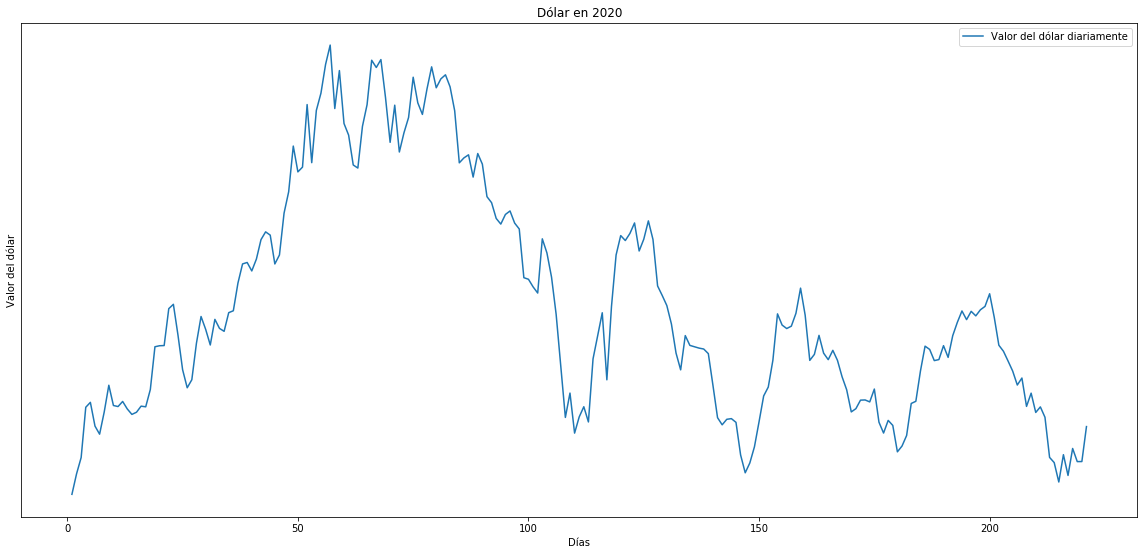

In [66]:
#Ahora graficamos las variables anteriores 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(2,1,1)

ax.plot(dia, value, label="Valor del dólar diariamente")
ax.set_yticks(np.arange(700,800,100))
ax.set_xlabel("Días")
ax.set_ylabel("Valor del dólar")
ax.set_title("Dólar en 2020")
ax.legend()


Text(0.5, 1.0, 'Histograma que muestra la frecuencia del valor del dólar 2020')

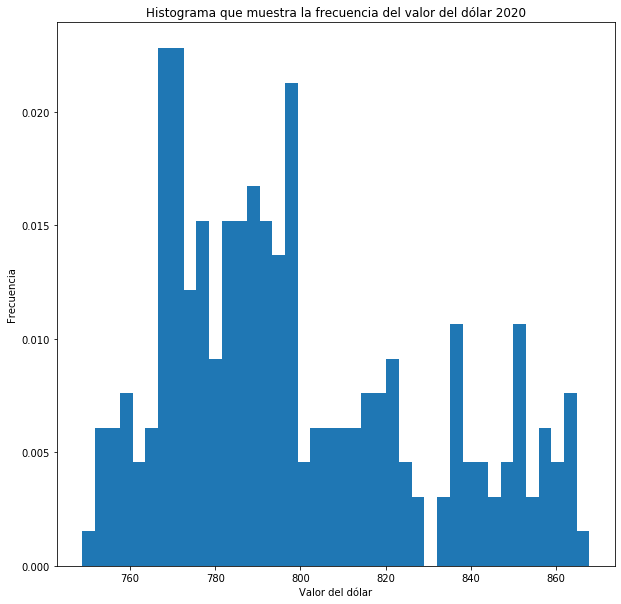

In [67]:
#Ahora constuyamos un histograma 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(value, bins=40, density=True)
ax.set_xlabel("Valor del dólar")
ax.set_ylabel("Frecuencia")
ax.set_title("Histograma que muestra la frecuencia del valor del dólar 2020")

In [68]:
#Corremos la función M-H para el modelo propuesto respectivo (el que se uso en la priemra parte)
accepted, rejected = metropolis_hastings(calculo_log_manual, prior, modelo_propuesto, [media,0.1], 50000, valores_dolar, acceptance)


In [69]:
#Retornamos los últimos 10 valores aceptados
accepted[-10:,1]

array([28.82521308, 29.47757369, 28.89533692, 29.96069961, 29.88348076,
       29.95823045, 28.74892408, 29.56653327, 29.25773513, 29.86318081])

(44585, 2)

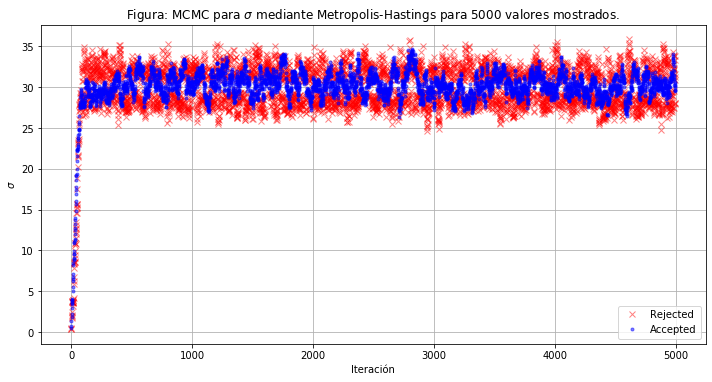

In [70]:
#Veamos un gráfico de como se comporta la desviación típica en las primeras 5000 iteraciones
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:5000,1], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:5000,1], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteración")
ax.set_ylabel("$\sigma$")
ax.set_title("Figura: MCMC para $\sigma$ mediante Metropolis-Hastings para 5000 valores mostrados.")
ax.grid()
ax.legend()

fig.tight_layout()
accepted.shape

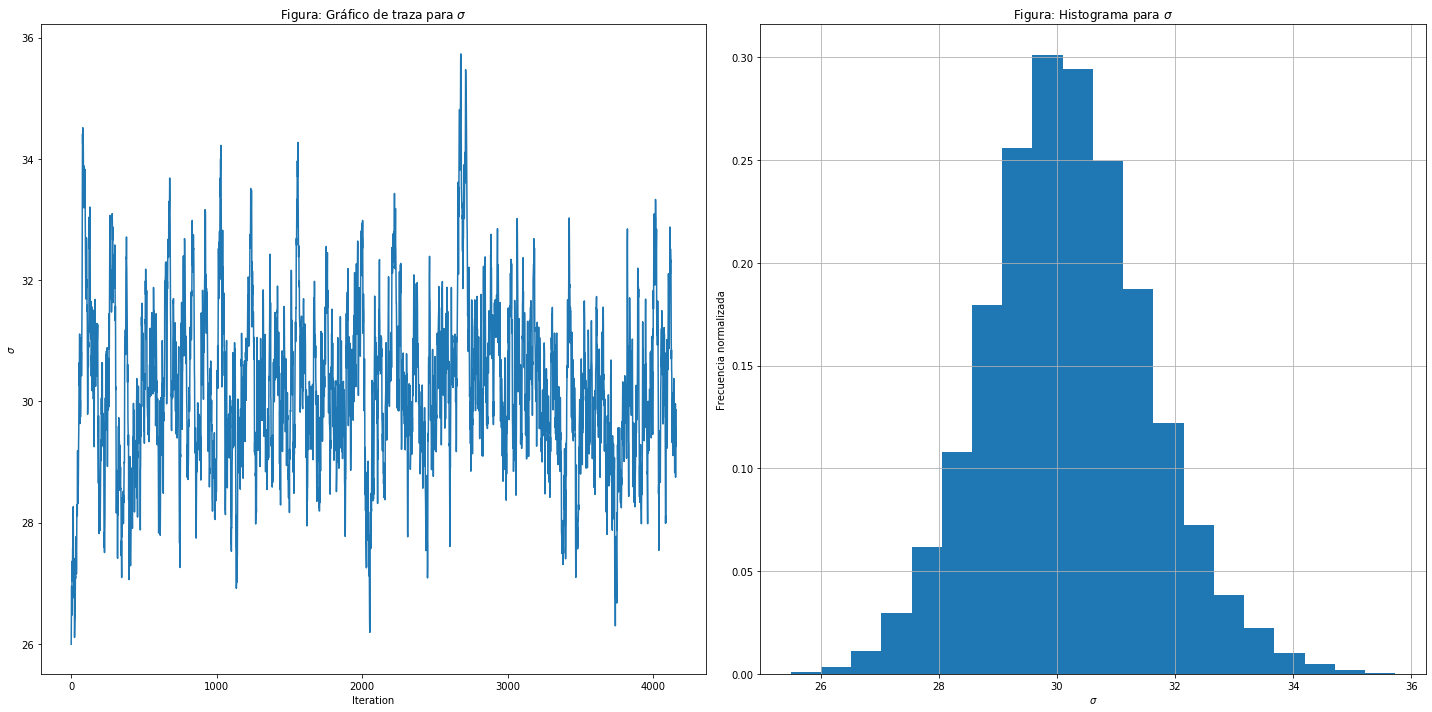

In [71]:
#Ahora graficaremos la desviación típica para ver si se comporta como una normal, pero descartamos el primer 25% de valores
hist_show=int(-0.75*accepted.shape[0])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figura: Gráfico de traza para $\sigma$")
ax.set_ylabel("$\sigma$")
ax.set_xlabel("Iteration")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20,density=True)
ax.set_ylabel("Frecuencia normalizada")
ax.set_xlabel("$\sigma$")
ax.set_title("Figura: Histograma para $\sigma$")
fig.tight_layout()


ax.grid("off")

798.6275113122173 30.23060286276936
(44585, 2)


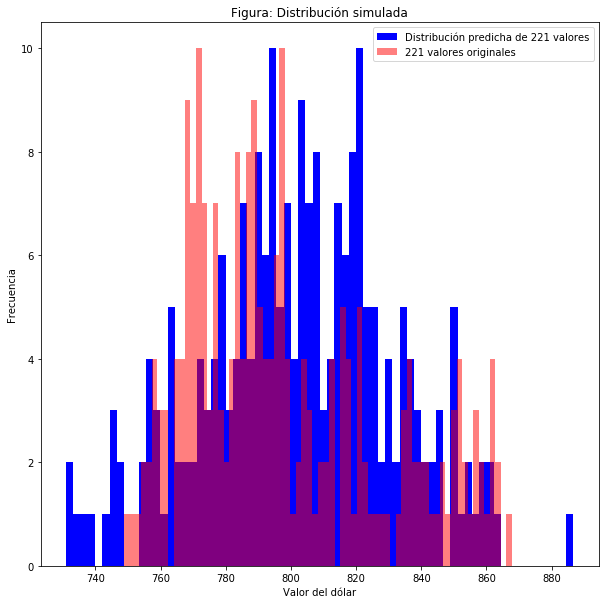

In [72]:
#Ahora veamos una comparación entre la distribución predicha y la distribución original
mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
accepted.shape
print(mu, sigma)
print(accepted.shape)
model = lambda t,mu,sigma:np.random.normal(mu,sigma,t)
poblacion_gen=model(valores_dolar.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( poblacion_gen ,bins=70 ,label="Distribución predicha de 221 valores", color = 'Blue')
ax.hist( valores_dolar,bins=70 ,alpha=0.5, label="221 valores originales", color = 'Red')
ax.set_xlabel("Valor del dólar")
ax.set_ylabel("Frecuencia")
ax.set_title("Figura: Distribución simulada")
ax.legend()

__VEMOS QUE LA PREDICCIÓN SUFRE PROBLEMAS EN EL ÁREA DONDE EL VALOR DEL DÓLAR ES SUPERIOR A 800 PESOS CHILENOS (SIN CONSIDERAR LOS VALORES EXTREMOS, QUE SON LOS MENORES A 740 Y MAYORES A 860), ESTO ES DEBIDO A LAS ALTAS FLUCTUACIONES QUE SUFRIÓ EL DOLAR LOS PRIMEROS 3-4 MESES DEL AÑO. ADEMÁS, LA APROXIMACIÓN MEDIANTE UN MODELO NORMAL NO ES DEL TODO CORRECTA, PERO ES ÚTIL PARA PREDECIR VALORES CERCANOS A LA MEDIA DE LA MUESTRA.__

__Por ejemplo, si la muestra de valores del dólar siguieran una distribución normal, la predicción debería verse parecida al siguiente gráfico.__

798.6275113122173 30.23060286276936
(44585, 2)


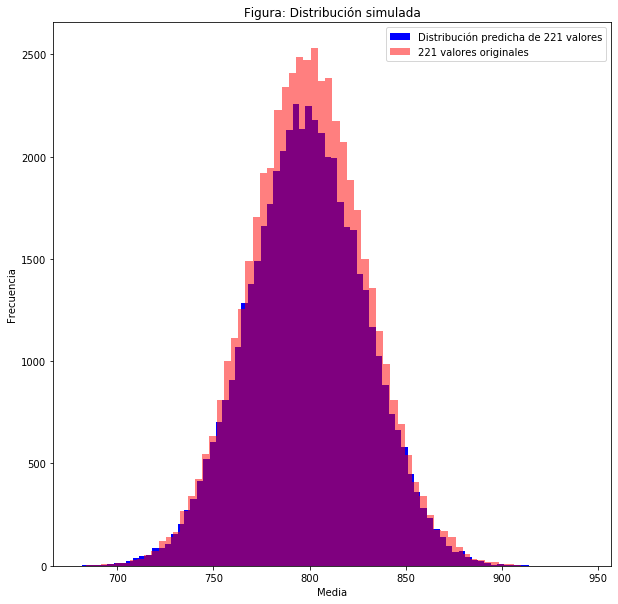

In [73]:
#Ahora veamos una comparación entre la distribución predicha y la distribución original
mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
accepted.shape
print(mu, sigma)
print(accepted.shape)
model = lambda t,mu,sigma:np.random.normal(mu,sigma,t)
poblacion_gen=model(pob_aleatoria.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( poblacion_gen ,bins=70 ,label="Distribución predicha de 221 valores", color = 'Blue')
ax.hist( pob_aleatoria,bins=70 ,alpha=0.5, label="221 valores originales", color = 'Red')
ax.set_xlabel("Media")
ax.set_ylabel("Frecuencia")
ax.set_title("Figura: Distribución simulada")
ax.legend()

__CONCLUSIÓN: VEMOS QUE SE LOGRÓ PREDECIR DE CIERTA MANERA LA DISTRIBUCIÓN DEL VALOR DEL DÓLAR BAJO CIERTAS HIPÓTESIS, AÚN CUANDO LA DISTRIBUCIÓN NO SIGUE EXACTAMENTE UNA DISTRIBUCIÓN NORMAL. PERO EL ALGORITMO SE ADAPTÓ PARA PODER PREDECIR EL VALOR DE CAMBIO DE LA MONEDA ESTADOUNIDENSE EN CHILE, LO QUE DEMUESTRA QUE AUNQUE NO SE POSEA CONOCIMIENTO SOBRE UNA DISTRIBUCIÓN PARA LOS DATOS USADOS, PODEMOS PREDECIR SU COMPORTAMIENTO MEDIANTE METROPOLIS-HASTINGS. TAMBIÉN HAY QUE RECALCAR QUE EL VALOR DEL DÓLAR ESTE AÑO SUFRIÓ FLUCTUACIONES IMPORTANTES EN LOS PRIMEROS 3-4 MESES, QUE AFECTARON EN CIERTA MEDIDA PARA ESCOGER ALGUNA DISTRIBUCIÓN ADECUADA.__

Para comprobar que la distribución no cumple con una distribución normal, usaremos el testeo de Kolmogorov-Smirnov

In [74]:
from scipy import stats
ks_stat, kp_valor = stats.kstest(valores_dolar, cdf = 'norm', args = (media, std), N = len(valores_dolar))
print(ks_stat)
print(kp_valor)

0.12257260700657246
0.002369310092055458


__Acá podemos ver que el valor del _p-valor_ es menor que un nivel de significancia del 0.05, por tanto no sigue una distribución normal. Pero aún así, el algoritmo fue capaz de predecir de cierta forma la distribución de _valores_dolar_ para un modelo normal propuesto.__

__VEAMOS QUE PASA SI APLICAMOS UN MODELO GAMMA PARA PREDECIR MEDIANTE METROPOLIS HASTINGS__

In [75]:

modelo_propuesto_gamma = lambda x: np.random.normal(x,[0.05,5],(2,))
import math
def prior(w):
    if(w[0]<=0 or w[1] <=0):
        return 0
    else:
        return 1
    
def manual_log_lik_gamma(x,data):
    return np.sum((x[0]-1)*np.log(data) - (1/x[1])*data - x[0]*np.log(x[1]) - np.log(math.gamma(x[0])))
    
def log_lik_gamma(x,data):
    return np.sum(np.log(scipy.stats.gamma(a=x[0],scale=x[1],loc=0).pdf(data)))

In [76]:
accepted, rejected = metropolis_hastings(manual_log_lik_gamma, prior, modelo_propuesto_gamma, [4, 10], 50000, valores_dolar, acceptance)

In [77]:
#Retornamos los últimos 10 valores aceptados
print(accepted.shape)
accepted[-10:]

(5245, 2)


array([[37.87899919, 20.88366596],
       [37.92951554, 21.29134963],
       [37.96260178, 21.42650186],
       [37.91238733, 21.25826177],
       [37.95421394, 20.88066101],
       [37.96136137, 20.81000762],
       [37.91231929, 21.30684238],
       [37.8683244 , 21.24097003],
       [37.86425105, 21.19354561],
       [37.85676718, 21.14160485]])

In [78]:
#a = media # parametro de forma.
#gamma = stats.gamma(a)
#x = np.linspace(gamma.ppf(0.01),gamma.ppf(0.99), 221)
#len(x)

Text(0.5, 1.0, 'Figura: MCMC para $a$ y $b$ con Metropolis-Hastings para los últimos 50 valores.')

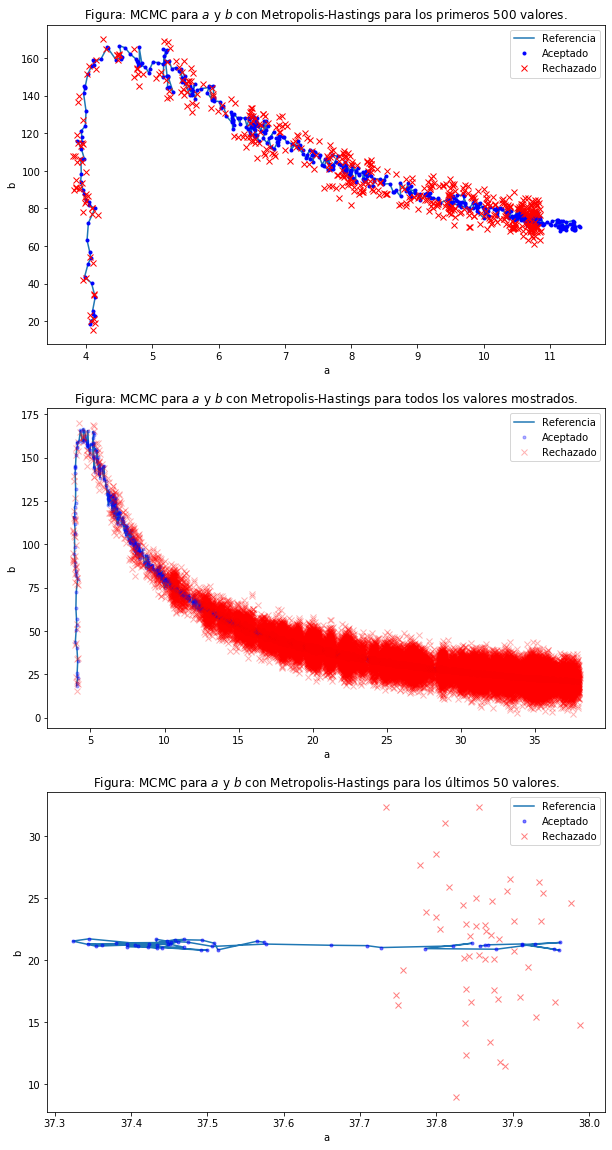

In [79]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
ax.plot(accepted[:500,0], accepted[:500,1], label="Referencia")
ax.plot(accepted[:500,0], accepted[:500,1], 'b.', label='Aceptado')
ax.plot(rejected[:500,0], rejected[:500,1], 'rx', label='Rechazado')
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figura: MCMC para $a$ y $b$ con Metropolis-Hastings para los primeros 500 valores.")  


ax = fig.add_subplot(3,1,2)
ax.plot(accepted[:,0], accepted[:,1], label="Referencia")
ax.plot(accepted[:,0], accepted[:,1], 'b.', label='Aceptado',alpha=0.3)
ax.plot(rejected[:,0], rejected[:,1], 'rx', label='Rechazado',alpha=0.3)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figura: MCMC para $a$ y $b$ con Metropolis-Hastings para todos los valores mostrados.") 

to_show=50
ax = fig.add_subplot(3,1,3)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], label="Referencia")
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], 'b.', label='Aceptado',alpha=0.5)
ax.plot(rejected[-to_show:,0], rejected[-to_show:,1], 'rx', label='Rechazado',alpha=0.5)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figura: MCMC para $a$ y $b$ con Metropolis-Hastings para los últimos 50 valores.")  


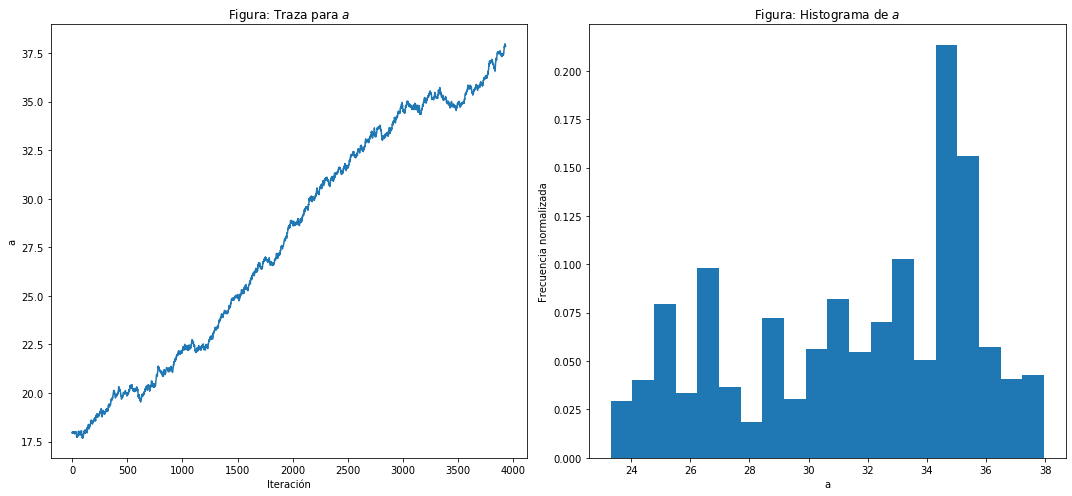

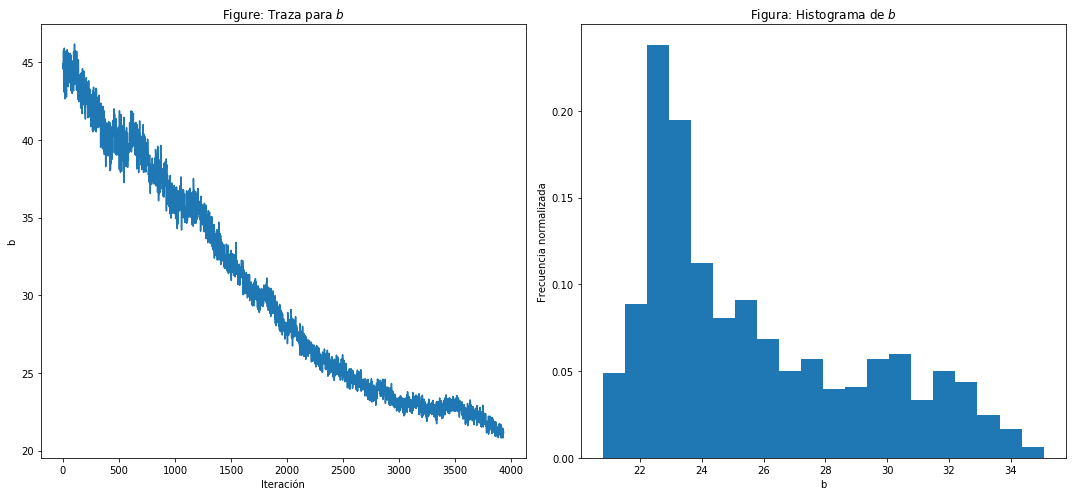

In [80]:
show=int(-0.75*accepted.shape[0])
hist_show=int(-0.50*accepted.shape[0])


fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,0])
ax.set_title("Figura: Traza para $a$")
ax.set_xlabel("Iteración")
ax.set_ylabel("a")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,0], bins=20, density=True)
ax.set_ylabel("Frecuencia normalizada")
ax.set_xlabel("a")
ax.set_title("Figura: Histograma de $a$")
fig.tight_layout()

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figure: Traza para $b$")
ax.set_xlabel("Iteración")
ax.set_ylabel("b")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20, density=True)
ax.set_ylabel("Frecuencia normalizada")
ax.set_xlabel("b")
ax.set_title("Figura: Histograma de $b$")
fig.tight_layout()



24.0367317007721 40.40639632727395


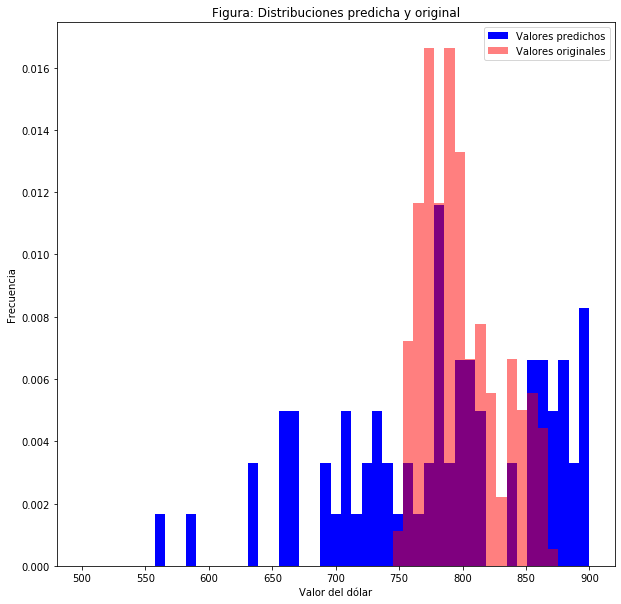

In [81]:
show=-int(accepted.shape[0])

mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.gamma(mu,sigma,t)
t=np.arange(value.shape[0])
observation_gen=model(t.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)



ax.hist( observation_gen,bins=np.linspace(500,900,50) ,density=True,label="Valores predichos", color = 'Blue')
ax.hist( value,bins=np.linspace(500,900,50) ,alpha=0.5,density=True, label="Valores originales", color = 'Red')
ax.set_xlabel("Valor del dólar")
ax.set_ylabel("Frecuencia")
ax.set_title("Figura: Distribuciones predicha y original")
ax.legend()

__CONCLUSIÓN: VEMOS QUE BAJO UN MODELO PROPUESTO BASADO EN UNA DISTRIBUCIÓN GAMMA, NO SE LOGRA OBTENER UNA PREDICCIÓN ÓPTIMA, POR LO TANTO LA DISTRIBUCIÓN DE LOS VALORES DEL DÓLAR SE ALEJA INCONMENSURABLEMENTE DE UNA DISTRIBUCIÓN GAMMA.__

Para comprobar que la distribución no cumple con una distribución normal, usaremos el testeo de Kolmogorov-Smirnov

In [82]:
ks_stat, kp_valor = stats.kstest(valores_dolar, cdf = 'gamma', args = (media, std), N = len(valores_dolar))
print(ks_stat)
print(kp_valor)

0.48228422909394847
7.982110055996606e-48


__Acá podemos ver que el valor del _p-valor_ está muy por debajo del nivel de significancia (0.05), por tanto no sigue una distribución Gamma. Pero aún así, el algoritmo fue capaz de predecir de cierta forma la distribución de _valores_dolar_ para un modelo Gamma propuesto, pero con mucho error de exactitud.__